In [3]:
import numpy as np
import pickle
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [20]:
data_path = "./cars.csv"
data = pd.read_csv(data_path, sep=',')
data.to_numpy()
print(data.shape)

(36, 5)


In [21]:
data.dtypes.value_counts()


int64     3
object    2
dtype: int64

In [27]:
x_data = data[['Weight', 'Volume']].to_numpy()
y_data = data['CO2'].to_numpy()

In [28]:
x_data

array([[ 790, 1000],
       [1160, 1200],
       [ 929, 1000],
       [ 865,  900],
       [1140, 1500],
       [ 929, 1000],
       [1109, 1400],
       [1365, 1500],
       [1112, 1500],
       [1150, 1600],
       [ 980, 1100],
       [ 990, 1300],
       [1112, 1000],
       [1252, 1600],
       [1326, 1600],
       [1330, 1600],
       [1365, 1600],
       [1280, 2200],
       [1119, 1600],
       [1328, 2000],
       [1584, 1600],
       [1428, 2000],
       [1365, 2100],
       [1415, 1600],
       [1415, 2000],
       [1465, 1500],
       [1490, 2000],
       [1725, 2000],
       [1523, 1600],
       [1705, 2000],
       [1605, 2100],
       [1746, 2000],
       [1235, 1600],
       [1390, 1600],
       [1405, 1600],
       [1395, 2500]], dtype=int64)

In [29]:
from sklearn.linear_model import LinearRegression

LR.fit(x_data, y_data)

LinearRegression()

In [30]:
predictedCO2 = LR.predict([[2300, 1300]])

In [31]:
LR.coef_

array([0.00755095, 0.00780526])

In [32]:
predictedCO2

array([107.2087328])

Done normal linear regression



In [2]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [3]:
data_path = "./cars.csv"
data = pd.read_csv(data_path, sep=',')

print(data.shape)

(36, 5)


In [7]:
X_data = data[['Weight', 'Volume']].to_numpy()
y_data = data['CO2'].to_numpy()

In [8]:
kf = KFold(shuffle=True, random_state=72018, n_splits=3)

In [9]:
for train_index, test_index in kf.split(X_data):
    print("Train index:", train_index[:10], len(train_index))
    print("Test index:",test_index[:10], len(test_index))
    print('')

Train index: [ 1  2  4  5  6  7  8 10 11 12] 24
Test index: [ 0  3  9 13 14 15 17 19 28 29] 12

Train index: [ 0  1  3  5  8  9 10 13 14 15] 24
Test index: [ 2  4  6  7 11 12 24 25 26 31] 12

Train index: [ 0  2  3  4  6  7  9 11 12 13] 24
Test index: [ 1  5  8 10 16 18 20 21 22 23] 12



In [13]:
scores = []
lr = LinearRegression()

for train_index, test_index in kf.split(X_data):
    X_train, X_test, y_train, y_test = (X_data[train_index, :], 
                                        X_data[test_index, :], 
                                        y_data[train_index], 
                                        y_data[test_index])
    
    lr.fit(X_train, y_train)
        
    y_pred = lr.predict(X_test)

    score = r2_score(y_test, y_pred)
    
    scores.append(score)
    
scores

[0.4976786744783538, 0.3781549390026453, -0.4963167598617597]

In [16]:
scores = []

lr = LinearRegression()
s = StandardScaler()

for train_index, test_index in kf.split(X_data):
    X_train, X_test, y_train, y_test = (X_data[train_index, :], 
                                        X_data[test_index, :], 
                                        y_data[train_index], 
                                        y_data[test_index])
    
    X_train_s = s.fit_transform(X_train)
    
    lr.fit(X_train_s, y_train)
    
    X_test_s = s.transform(X_test)
    
    y_pred = lr.predict(X_test_s)

    score = r2_score(y_test, y_pred)
    
    scores.append(score)
print(scores)

[0.4976786744783538, 0.37815493900264563, -0.4963167598617597]


In [17]:
s = StandardScaler()
lr = LinearRegression()
estimator = Pipeline([("scaler", s),
                      ("regression", lr)])

In [18]:
predictions = cross_val_predict(estimator, X_data, y_data, cv=kf)

In [20]:
r2_score(y_data, predictions)

0.2635012273172592

In [21]:
np.mean(scores)

0.1265056178730799

In [22]:
alphas = np.geomspace(1e-9, 1e0, num=10)
alphas

array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00])

In [23]:
scores = []
coefs = []
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([
        ("scaler", s),
        ("lasso_regression", las)])

    predictions = cross_val_predict(estimator, X_data, y_data, cv = kf)
    
    score = r2_score(y_data, predictions)
    
    scores.append(score)

In [24]:
list(zip(alphas,scores))

[(1e-09, 0.2635012272629754),
 (1e-08, 0.2635012267748713),
 (1e-07, 0.26350122176396085),
 (1e-06, 0.2635012011949336),
 (1e-05, 0.2635005347849875),
 (0.0001, 0.26349679744487575),
 (0.001, 0.2634842554615041),
 (0.01, 0.2633569294305538),
 (0.1, 0.26189304939801694),
 (1.0, 0.23019380335703288)]

In [25]:
Lasso(alpha=1e-6).fit(X_data, y_data).coef_

array([0.00755095, 0.00780526])

In [26]:
Lasso(alpha=1.0).fit(X_data, y_data).coef_

array([0.00753002, 0.00780828])

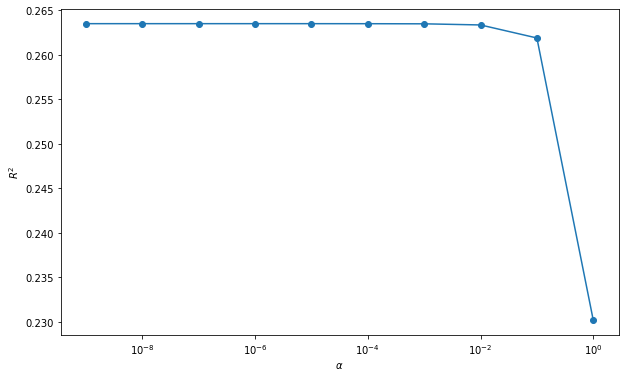

In [27]:
plt.figure(figsize=(10,6))
plt.semilogx(alphas, scores, '-o')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$');

In [28]:
pf = PolynomialFeatures(degree=3)

scores = []
alphas = np.geomspace(0.06, 6.0, 20)
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([
        ("scaler", s),
        ("make_higher_degree", pf),
        ("lasso_regression", las)])

    predictions = cross_val_predict(estimator, X_data, y_data, cv = kf)
    
    score = r2_score(y_data, predictions)
    
    scores.append(score)

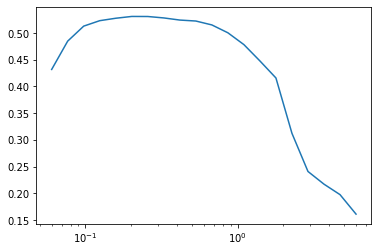

In [29]:
plt.semilogx(alphas, scores);

In [30]:
best_estimator = Pipeline([
                    ("scaler", s),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("lasso_regression", Lasso(alpha=0.03))])

best_estimator.fit(X_data, y_data)
best_estimator.score(X_data, y_data)

0.5366706865383412

In [31]:
best_estimator.named_steps["lasso_regression"].coef_

array([ 0.        ,  2.04252234,  3.26959714,  2.21906509, -0.66592006,
        1.28836198])